In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
pip install xgboost

In [1]:
pip install -U imbalanced-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Private\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2021.11  |           py39_0           7 KB
    anaconda-custom            |           py39_1           4 KB
    ca-certificates-2021.10.8  |       h5b45459_0         176 KB  conda-forge
    certifi-2021.10.8          |   py39hcbf5309_2         145 KB  conda-forge
    conda-4.12.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    openssl-1.1.1n             |       h8ffe710_0         5.7 MB  conda-forge
    pandas-1.4.2               |   py39h2e25243_1        11.0 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    -------------


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.11=py39_0
  - defaults/win-64::bkcharts==0.2=py39haa95532_0
  - defaults/noarch::dask==2021.10.0=pyhd3eb1b0_0
  - defaults/noarch::seaborn==0.11.2=pyhd3eb1b0_0
  - defaults/win-64::statsmodels==0.12.2=py39h2bbff1b_0


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda




pandas-1.4.2         | 11.0 MB   | #########5 |  96% 
pandas-1.4.2         | 11.0 MB   | ########## | 100% 

python_abi-3.9       | 4 KB      |            |   0% 
python_abi-3.9       | 4 KB      | ########## | 100% 

openssl-1.1.1n       | 5.7 MB    |            |   0% 
openssl-1.1.1n       | 5.7 MB    | 1          |   2% 
openssl-1.1.1n       | 5.7 MB    | ##3        |  24% 
openssl-1.1.1n       | 5.7 MB    | ####2      |  43% 
openssl-1.1.1n       | 5.7 MB    | ######7    |  67% 
openssl-1.1.1n       | 5.7 MB    | #########  |  91% 
openssl-1.1.1n       | 5.7 MB    | ########## | 100% 

certifi-2021.10.8    | 145 KB    |            |   0% 
certifi-2021.10.8    | 145 KB    | ########## | 100% 
certifi-2021.10.8    | 145 KB    | ########## | 100% 

imbalanced-learn-0.7 | 97 KB     |            |   0% 
imbalanced-learn-0.7 | 97 KB     | ########## | 100% 
imbalanced-learn-0.7 | 97 KB     | ########## | 100% 

_anaconda_depends-20 | 7 KB      |            |   0% 
_anaconda_depends-20 | 

In [5]:
import pandas as pd
data = pd.read_csv('aug_train.csv')

# Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Pengamatan\:
1. Data terdiri dari 19157 baris
2. Terdapat 8 kolom yang memiliki missing values (count < rows)
3. Sepertinya setiap kolom sudah sesuai tipe datanya

# Cuplikan Data

In [7]:
data.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
7002,31531,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,1000-4999,Pvt Ltd,4,108,0.0
10879,1490,city_104,0.924,NaN,No relevent experience,no_enrollment,High School,NaN,5,NaN,NaN,never,24,0.0
8632,10494,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,10,100-500,Pvt Ltd,1,28,0.0
5810,1672,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,10000+,Pvt Ltd,1,49,0.0
10221,18386,city_21,0.624,NaN,No relevent experience,no_enrollment,Graduate,STEM,<1,50-99,Public Sector,1,95,1.0


# Statistical Summary

In [8]:
nums = ['city_development_index', 'training_hours', 'target']
cats = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

In [9]:
data[nums].describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


Pengamatan:
1. Kolom `city_development_index` dan `target` tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
2. Kolom `target` dan `training_hours` tampaknya skew ke kanan (long-right tail)
3. Kolom `city_developmet_index`  tampaknya skew ke kiri (long-left tail)
3. Kolom `training_hours` dan `target` ternyata bernilai boolean/binary

In [10]:
data[cats].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


Beberapa pengamatan:
1. Data dinominasi (proporsi lebih dari 80% dari jumlah baris data) oleh kaum Male (`gender`), memiliki pengalaman (`relevant_experience`), major_discipline dipenuhi STEM (`major_discipline`) dan berpendidikan S1 (`education_level`)
2. Kolom yang menduduki posisi pertama dengan jumlah unique values yang tinggi (memiliki kardinalitas) jatuh pada kolom `city` yaitu 123 dan posisi kedua diduduki oleh kolom `experience` yaitu berjumlah 22. 

# Drop Kolom

In [11]:
#drop kolom city
data = data.drop(columns='city')

In [12]:
#drop kolom experience
data = data.drop(columns='experience')

# Missing Data

In [13]:
data.isna().sum()

enrollee_id                  0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

* `enrolled_university`, `last_new_job`, `education_level` \: Drop karena nilainya kecil
*  `gender`, `major_discipline`, `company_size`, `company_type` \: Menggunakan modus

In [14]:
# yang menggunakan mode
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['major_discipline'].fillna(data['major_discipline'].mode()[0], inplace=True)
data['company_size'].fillna(data['company_size'].mode()[0], inplace=True)
data['company_type'].fillna(data['company_type'].mode()[0], inplace=True)

In [15]:
data.isna().sum()

enrollee_id                 0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university       386
education_level           460
major_discipline            0
company_size                0
company_type                0
last_new_job              423
training_hours              0
target                      0
dtype: int64

In [16]:
data = data.dropna(subset=['enrolled_university', 'last_new_job', 'education_level'])
data.isna().sum()

enrollee_id               0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# Data Duplicated

In [17]:
data.duplicated().sum()

0

In [17]:
data.duplicated(subset=['training_hours','city_development_index', 'gender']).sum()

12104

In [18]:
data.duplicated(subset=['training_hours','city_development_index']).sum()

12836

In [19]:
print(f'Jumlah row duplicated sebelum dihapus {data.duplicated().sum()}')
data.drop_duplicates(inplace=True) # note: default-nya keep='First' (tidak perlu ditulis)
print(f'Jumlah row duplicated SETELAH dihapus {data.duplicated().sum()}')

Jumlah row duplicated sebelum dihapus 0
Jumlah row duplicated SETELAH dihapus 0


# Outliers Handling

In [18]:
from scipy import stats

In [19]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

filtered_entries = np.array([True] * len(data))

for col in nums:
    zscore = abs(stats.zscore(data[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
data = data[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 18044
Jumlah baris setelah memfilter outlier: 17605


# Log / Exp Transformation

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

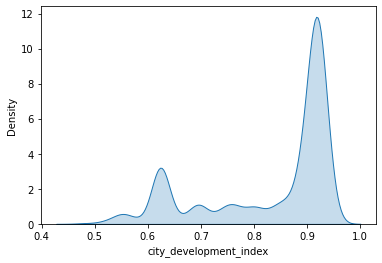

In [20]:
#Distribusi city_developmemnt_index asli
sns.kdeplot(
   data=data, x='city_development_index', 
   fill=True, common_norm=False, palette="crest",
)

<AxesSubplot:ylabel='Density'>

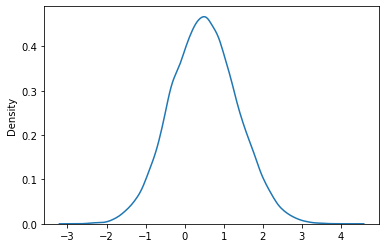

In [21]:
from scipy.stats import skewnorm

sns.kdeplot(skewnorm.rvs(data['city_development_index']))

In [22]:
data['skewnorm_city_development_index'] = skewnorm.rvs(data['city_development_index'])
data = data.drop(columns='city_development_index')

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

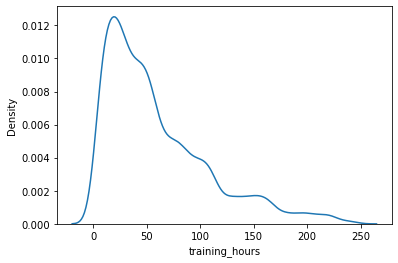

In [23]:
# distribusi training_hours (nilai asli)
sns.kdeplot(data['training_hours'])

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

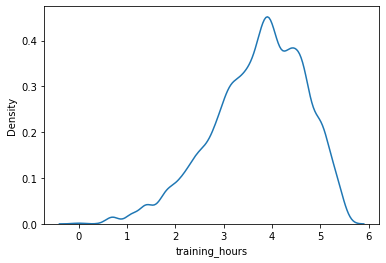

In [24]:
sns.kdeplot(np.log(data['training_hours']))

In [25]:
data['log_training_hours'] = np.log(data['training_hours'])

In [26]:
# drop kolom training_hours (nilai asli)
data = data.drop(columns='training_hours')

# Normalization / Standarzitation

In [27]:
data.describe()

,enrollee_id,target,skewnorm_city_development_index,log_training_hours
count,17605.000000,17605.000000,17605.000000,17605.000000
mean,16903.373701,0.246294,0.504558,3.716371
std,9661.905849,0.430864,0.861437,0.951938
min,1.000000,0.000000,-2.692133,0.000000
25%,8535.000000,0.000000,-0.084231,3.135494
50%,17023.000000,0.000000,0.490293,3.828641
75%,25317.000000,0.000000,1.074405,4.430817
max,33380.000000,1.000000,4.407913,5.497168


In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data['log_training_hours_std'] = StandardScaler().fit_transform(data['log_training_hours'].values.reshape(len(data), 1))
data['skewnorm_city_development_index_std'] = StandardScaler().fit_transform(data['skewnorm_city_development_index'].values.reshape(len(data), 1))

In [29]:
data.describe()

,enrollee_id,target,skewnorm_city_development_index,log_training_hours,log_training_hours_std,skewnorm_city_development_index_std
count,17605.000000,17605.000000,17605.000000,17605.000000,1.760500e+04,1.760500e+04
mean,16903.373701,0.246294,0.504558,3.716371,3.900317e-16,-9.375094e-17
std,9661.905849,0.430864,0.861437,0.951938,1.000028e+00,1.000028e+00
min,1.000000,0.000000,-2.692133,0.000000,-3.904117e+00,-3.710988e+00
25%,8535.000000,0.000000,-0.084231,3.135494,-6.102215e-01,-6.835156e-01
50%,17023.000000,0.000000,0.490293,3.828641,1.179426e-01,-1.656008e-02
75%,25317.000000,0.000000,1.074405,4.430817,7.505392e-01,6.615262e-01
max,33380.000000,1.000000,4.407913,5.497168,1.870761e+00,4.531343e+00


# Feature Encoding

In [30]:
cats_updated = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_new_job']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(data[col].value_counts())
  print('---'*10, '\n')

value counts of column gender
Male      16252
Female     1182
Other       171
Name: gender, dtype: int64
------------------------------ 

value counts of column relevent_experience
Has relevent experience    12891
No relevent experience      4714
Name: relevent_experience, dtype: int64
------------------------------ 

value counts of column enrolled_university
no_enrollment       13049
Full time course     3444
Part time course     1112
Name: enrolled_university, dtype: int64
------------------------------ 

value counts of column education_level
Graduate          10931
Masters            4140
High School        1862
Phd                 388
Primary School      284
Name: education_level, dtype: int64
------------------------------ 

value counts of column major_discipline
STEM               15836
Humanities           641
Other                359
Business Degree      316
Arts                 246
No Major             207
Name: major_discipline, dtype: int64
------------------------------ 

In [31]:
# menghapus Other pada feature Gender karena tidak relate dengan gender manapun dan nilainya kecil sehingga bisa didrop, sehingga gender bisa Label Encoding
data = data[ ~(data['gender'] == 'Other')]
data

,enrollee_id,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,target,skewnorm_city_development_index,log_training_hours,log_training_hours_std,skewnorm_city_development_index_std
0,8949,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,1,1.0,1.370617,3.583519,-0.139563,1.005394
1,29725,Male,No relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,>4,0.0,-0.573087,3.850148,0.140535,-1.251021
2,11561,Male,No relevent experience,Full time course,Graduate,STEM,50-99,Pvt Ltd,never,0.0,0.900871,4.418841,0.737958,0.460074
4,666,Male,Has relevent experience,no_enrollment,Masters,STEM,50-99,Funded Startup,4,0.0,-0.435975,2.079442,-1.719625,-1.091850
5,21651,Male,Has relevent experience,Part time course,Graduate,STEM,50-99,Pvt Ltd,1,1.0,0.500914,3.178054,-0.565512,-0.004230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,Male,No relevent experience,no_enrollment,Graduate,Humanities,50-99,Pvt Ltd,1,1.0,0.932097,3.737670,0.022375,0.496324
19154,31398,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,4,1.0,0.838312,3.951244,0.246739,0.387450
19155,24576,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,4,0.0,-0.276882,3.784190,0.071245,-0.907162
19156,5756,Male,Has relevent experience,no_enrollment,High School,STEM,500-999,Pvt Ltd,2,0.0,2.459866,4.574711,0.901703,2.269887


In [32]:
data['gender'].value_counts()

Male      16252
Female     1182
Name: gender, dtype: int64

* `gender`, `relevent_experience`, `enrolled_university`, & `education_level`: Label encoding
* `major_discipline`, `company_size`, `company_type`, `last_new_job`: One Hot Encoding

In [33]:
mapping_gender = {
    'Male' : 0,
    'Female' : 1
}

mapping_pengalaman = {
    'No relevent experience' : 0,
    'Has relevent experience' : 1
}

mapping_enrolled_university = {
    'no_enrollment' : 0,
    'Part time course' : 1,
    'Full time course' : 2
}

mapping_pendidikan = {
    'Primary School' : 0,
    'High School' : 1,
    'Graduate' : 2,
    'Masters' : 3,
    'Phd' : 4
}

data['gender'] = data['gender'].map(mapping_gender)
data['relevent_experience'] = data['relevent_experience'].map(mapping_pengalaman)
data['enrolled_university'] = data['enrolled_university'].map(mapping_enrolled_university)
data['education_level'] = data['education_level'].map(mapping_pendidikan)

In [34]:
for cat in ['major_discipline', 'company_size', 'company_type', 'last_new_job']:
    onehots = pd.get_dummies(data[cat], prefix=cat)
    data = data.join(onehots)

In [35]:
# drop kolom major_discipline, company_size, company_type, last_new_job yang asli (karena sudah di-encoding)
data_prep = data.drop(columns=['major_discipline','company_size','company_type', 'last_new_job',])

In [36]:
data_prep

,enrollee_id,gender,relevent_experience,enrolled_university,education_level,target,skewnorm_city_development_index,log_training_hours,log_training_hours_std,skewnorm_city_development_index_std,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0,1,0,2,1.0,1.370617,3.583519,-0.139563,1.005394,...,0,0,0,1,1,0,0,0,0,0
1,29725,0,0,0,2,0.0,-0.573087,3.850148,0.140535,-1.251021,...,0,0,0,1,0,0,0,0,1,0
2,11561,0,0,2,2,0.0,0.900871,4.418841,0.737958,0.460074,...,0,0,0,1,0,0,0,0,0,1
4,666,0,1,0,3,0.0,-0.435975,2.079442,-1.719625,-1.091850,...,0,0,0,0,0,0,0,1,0,0
5,21651,0,1,1,2,1.0,0.500914,3.178054,-0.565512,-0.004230,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0,0,0,2,1.0,0.932097,3.737670,0.022375,0.496324,...,0,0,0,1,1,0,0,0,0,0
19154,31398,0,1,0,2,1.0,0.838312,3.951244,0.246739,0.387450,...,0,0,0,1,0,0,0,1,0,0
19155,24576,0,1,0,2,0.0,-0.276882,3.784190,0.071245,-0.907162,...,0,0,0,1,0,0,0,1,0,0
19156,5756,0,1,0,1,0.0,2.459866,4.574711,0.901703,2.269887,...,0,0,0,1,0,1,0,0,0,0


In [37]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17434 entries, 0 to 19157
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   enrollee_id                          17434 non-null  int64  
 1   gender                               17434 non-null  int64  
 2   relevent_experience                  17434 non-null  int64  
 3   enrolled_university                  17434 non-null  int64  
 4   education_level                      17434 non-null  int64  
 5   target                               17434 non-null  float64
 6   skewnorm_city_development_index      17434 non-null  float64
 7   log_training_hours                   17434 non-null  float64
 8   log_training_hours_std               17434 non-null  float64
 9   skewnorm_city_development_index_std  17434 non-null  float64
 10  major_discipline_Arts                17434 non-null  uint8  
 11  major_discipline_Business De

In [38]:
data_prep['target'].value_counts()

0.0    13141
1.0     4293
Name: target, dtype: int64

# Handle Class Imbalance

In [39]:
# pembuatan binary label target
data_prep['target_class'] = data_prep['target'] > 0.8
data_prep['target_class'].value_counts()

False    13141
True      4293
Name: target_class, dtype: int64

In [40]:
# pemisahan features vs target
X = data_prep[[col for col in data_prep.columns if (str(data_prep[col].dtype) != 'object') and col not in ['target', 'target_class']]]
y = data_prep['target_class'].values
print(X.shape)
print(y.shape)

(17434, 35)
(17434,)


In [41]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [42]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    13141
True      4293
dtype: int64


UNDERSAMPLING
False    8586
True     4293
dtype: int64


OVERSAMPLING
False    13141
True      6570
dtype: int64


SMOTE
False    13141
True      6570
dtype: int64


# HW 3

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

## Split test and train

In [45]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17434 entries, 0 to 19157
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   enrollee_id                          17434 non-null  int64  
 1   gender                               17434 non-null  int64  
 2   relevent_experience                  17434 non-null  int64  
 3   enrolled_university                  17434 non-null  int64  
 4   education_level                      17434 non-null  int64  
 5   target                               17434 non-null  float64
 6   skewnorm_city_development_index      17434 non-null  float64
 7   log_training_hours                   17434 non-null  float64
 8   log_training_hours_std               17434 non-null  float64
 9   skewnorm_city_development_index_std  17434 non-null  float64
 10  major_discipline_Arts                17434 non-null  uint8  
 11  major_discipline_Business De

In [46]:
x = data_prep.drop(columns=['target','enrollee_id', 'skewnorm_city_development_index','log_training_hours', 'target_class'])
y = data_prep['target']

In [47]:
x.head()

,gender,relevent_experience,enrolled_university,education_level,log_training_hours_std,skewnorm_city_development_index_std,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0,1,0,2,-0.139563,1.005394,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,2,0.140535,-1.251021,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,2,2,0.737958,0.460074,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,1,0,3,-1.719625,-1.091850,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,1,1,2,-0.565512,-0.004230,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


## Evaluation Reg Linear

In [48]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:


model = LinearRegression() #inisiasi model
model.fit(xtrain, ytrain) #fit model, dari garis lurus menjadi miring hingga jaraknya minimum antara titik dan garis

LinearRegression()

In [51]:
y_pred = model.predict(xtest)

In [52]:
y_pred

array([0.42736816, 0.18798828, 0.27716064, ..., 0.38104248, 0.17077637,
       0.14477539])

In [53]:
#r-squared
r2_score(ytest,y_pred)

0.05470749503875638

In [54]:
#rmse 
mean_squared_error(ytest,y_pred, squared=False)

0.4213872172360953

In [55]:
model.coef_

array([ 2.78539102e-02, -6.07320168e-02,  5.52196935e-02,  3.05436877e-02,
       -3.77867044e-03, -1.87644289e-02, -1.82076200e+11, -1.82076200e+11,
       -1.82076200e+11, -1.82076200e+11, -1.82076200e+11, -1.82076200e+11,
        1.14651093e+11,  1.14651093e+11,  1.14651093e+11,  1.14651093e+11,
        1.14651093e+11,  1.14651093e+11,  1.14651093e+11,  1.14651093e+11,
       -1.58610829e+10, -1.58610829e+10, -1.58610829e+10, -1.58610829e+10,
       -1.58610829e+10, -1.58610829e+10, -1.98924956e+11, -1.98924956e+11,
       -1.98924956e+11, -1.98924956e+11, -1.98924956e+11, -1.98924956e+11])

In [56]:
x.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'log_training_hours_std',
       'skewnorm_city_development_index_std', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'company_size_10/49', 'company_size_100-500',
       'company_size_1000-4999', 'company_size_10000+', 'company_size_50-99',
       'company_size_500-999', 'company_size_5000-9999', 'company_size_<10',
       'company_type_Early Stage Startup', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'last_new_job_1', 'last_new_job_2',
       'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
       'last_new_job_never'],
      dtype='object')

In [57]:
feat_imp = pd.DataFrame(model.coef_, columns = ['Importances']).join(pd.DataFrame(xtrain.columns,columns = ['Features']))

In [58]:
feat_imp.sort_values(by='Importances', ascending = False)

,Importances,Features
16,1.146511e+11,company_size_50-99
12,1.146511e+11,company_size_10/49
18,1.146511e+11,company_size_5000-9999
19,1.146511e+11,company_size_<10
17,1.146511e+11,company_size_500-999
15,1.146511e+11,company_size_10000+
13,1.146511e+11,company_size_100-500
14,1.146511e+11,company_size_1000-4999
2,5.521969e-02,enrolled_university
3,3.054369e-02,education_level


In [59]:
correlation = pd.DataFrame(data.corr().target.sort_values(ascending = False)).reset_index()

In [60]:
correlation

,index,target
0,target,1.000000
1,company_size_50-99,0.180517
2,enrolled_university,0.151606
3,company_type_Pvt Ltd,0.061975
4,last_new_job_never,0.059068
5,enrollee_id,0.048287
6,last_new_job_1,0.033410
7,gender,0.010560
8,major_discipline_STEM,0.009854
9,major_discipline_Business Degree,0.006945


pengamatan:

### Hyperparameter Tuning

In [61]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [62]:
alpha_try   = [0.01,0.1,1]
solver_try  = ['auto','lsqr','cholesky', 'sag', 'saga']
hyperparams = dict(alpha = alpha_try, solver = solver_try)

In [63]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [64]:
rs = RandomizedSearchCV(ridge, hyperparams, cv = 5,  random_state = 42)

In [65]:
rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': [0.01, 0.1, 1],
                                        'solver': ['auto', 'lsqr', 'cholesky',
                                                   'sag', 'saga']},
                   random_state=42)

In [66]:
y_pred = rs.predict(xtest)

In [67]:
r2_score(ytest,y_pred)

0.05472349454048486

In [68]:
rs.best_estimator_.get_params()

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'sag',
 'tol': 0.001}

## Evaluation Decision Tree

In [76]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
y_pred = dt.predict (xtest)
print('r2 (test):' + str(r2_score(ytest,y_pred)))
print('rmse(test):' + str(mean_squared_error(ytest,y_pred,squared = False)))

r2 (test):-0.8520770310319477
rmse(test):0.5898312425606322


In [77]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(xtrain,ytrain)

y_pred = model.predict(xtest)
eval_classification(model, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.30
Recall (Test Set): 0.31
F1-Score (Test Set): 0.31
AUC: 0.54


In [78]:
print('Train score: ' + str(model.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(xtest, ytest))) #accuracy

Train score: 1.0
Test score:0.6484858912594632


Overfit, Train>test

### Hyperparameter Tuning

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

In [80]:
# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': [1, 4, 8, 12, 16, 19, 23,
                                                      27, 31, 34, 38, 42, 46,
                                                      49, 53, 57, 61, 64, 68,
                                                      72, 76, 79, 83, 87, 91,
                                                      94, 98, 102, 106, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             50],
                                        'min_samples_split': [2, 5, 10, 100]},
                   random_state=42, scoring='precision')

In [81]:
# Predict & Evaluation
y_pred = model.predict(xtest)#Check performa dari model
eval_classification(model, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.47
Recall (Test Set): 0.13
F1-Score (Test Set): 0.20
AUC: 0.54


In [82]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 50
Best max_features: auto


In [83]:
print('Train score: ' + str(model.score(xtrain, ytrain)))
print('Test score:' + str(model.score(xtest, ytest)))

Train score: 0.554380664652568
Test score:0.47474747474747475


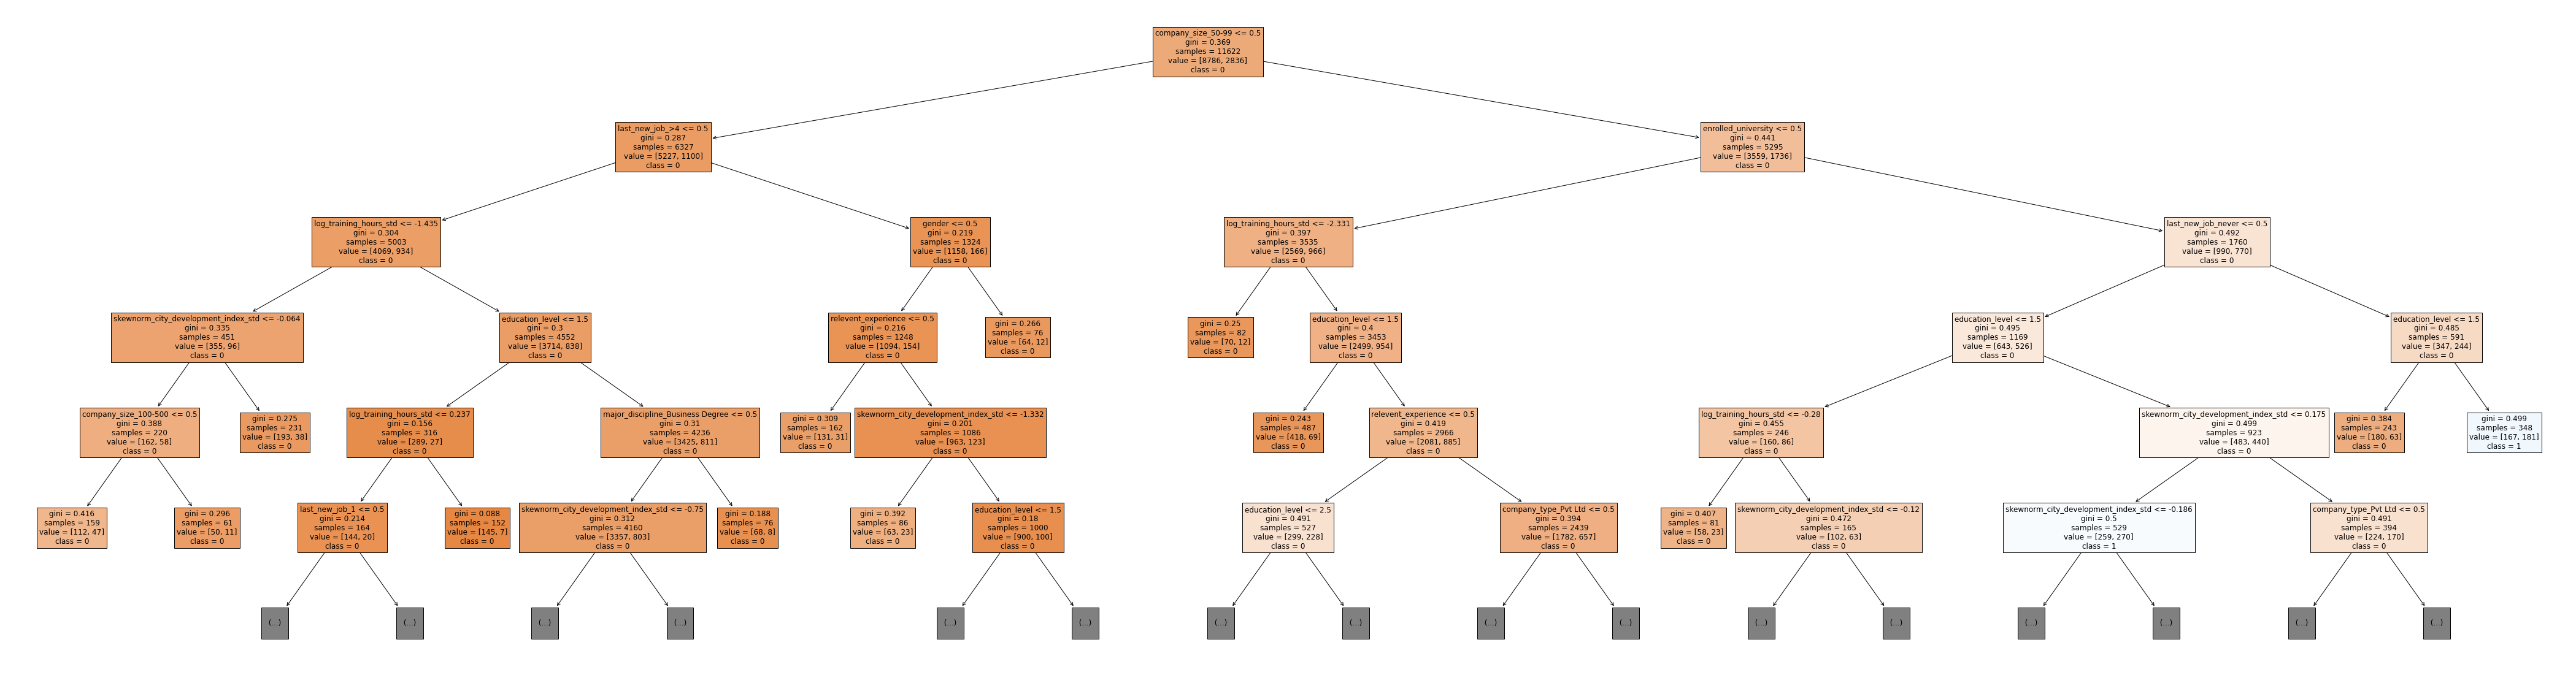

In [84]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(75, 20))
tree.plot_tree(model.best_estimator_,
               feature_names = x.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=12)
plt.show()

Text(0.5, 1.0, 'feature importance score')

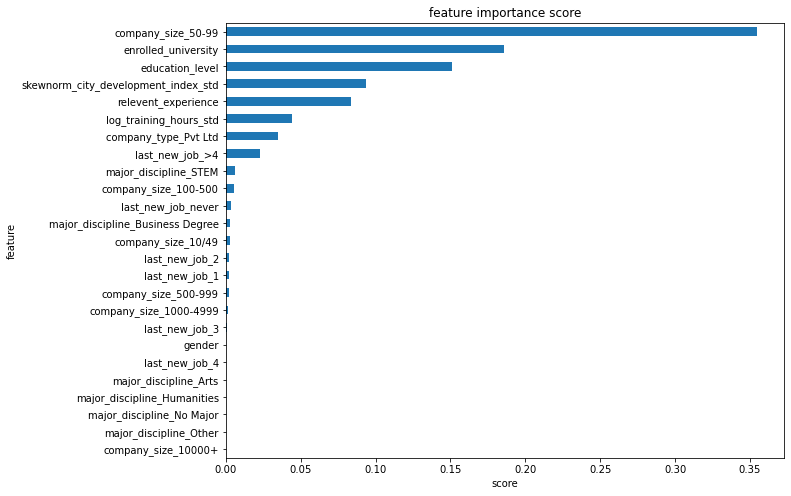

In [85]:
# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=x.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

## K- Nearest Neighbor

In [86]:
from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(xtrain, ytrain)

y_pred = model.predict(xtest)
eval_classification(model, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.47
Recall (Test Set): 0.13
F1-Score (Test Set): 0.20
AUC: 0.54


In [87]:
print('Train score: ' + str(model.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(xtest, ytest))) #accuracy

Train score: 0.554380664652568
Test score:0.47474747474747475


### Hyperpara Tuning

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fit Model & Evaluasi
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
eval_classification(model, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.48
Recall (Test Set): 0.12
F1-Score (Test Set): 0.20
AUC: 0.54


In [89]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 28
Best p: 1
Best algorithm: kd_tree


In [90]:
print('Train score: ' + str(model.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(xtest, ytest))) #accuracy

Train score: 0.6005961251862891
Test score:0.48118279569892475


## Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (random_state=42)
#rf.fit(x_norm, y_norm)
rf_model = rf.fit(xtrain, ytrain)

In [92]:
y_predicted = rf.predict(xtest)
y_predicted_train = rf.predict(xtrain)
#eval
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print('\nclassification report')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.82      4355
         1.0       0.38      0.21      0.27      1457

    accuracy                           0.72      5812
   macro avg       0.58      0.55      0.55      5812
weighted avg       0.67      0.72      0.68      5812

Random Forest: ROC AUC =  54.7 %
Random Forest: Precision =  38.0 %
Random Forest: Recall =  20.5 %
Random Forest: Accuracy =  71.7 %
Random Forest: F1-Score =  26.7 %


array([[3868,  487],
       [1158,  299]], dtype=int64)

In [93]:
#Save Machine Learning Model
import pickle
pickle.dump(rf_model, open('RandomForest.pkl', 'wb'))

In [94]:
#Load and print model score
loaded_model = pickle.load(open('RandomForest.pkl', 'rb'))
result = loaded_model.score(xtest,ytest)
print(result)

0.7169649002064694


In [95]:
#print model score to check if the model is overfitting or not
print('train score : ', str(round(loaded_model.score(xtrain, ytrain)*100,2)), '%')
print('test score : ', str(round(loaded_model.score(xtest, ytest)*100,2)),'%')

train score :  99.97 %
test score :  71.7 %


### Hyperpara Tuning

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
               'min_samples_split': [7,8,9,10],
               'min_samples_leaf': [1,2,3,4,5],
               'bootstrap': [True],
               'n_jobs':[-1]}

# Init random forest dengan randomsearch, cross validation = 5
rf = RandomForestClassifier(random_state=42)
clf = RandomizedSearchCV(rf, hyperparameters, cv=20, random_state=42)

#Fitting Model
best_model = clf.fit(xtrain,ytrain)

#Nilai hyperparameters terbaik
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])


#Prediksi menggunakan model baru
y_predicted = best_model.predict(xtest)#Check performa dari model
print('\nclassification report')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)

Best n_estimators: 100
Best max_features: auto
Best max_depth: None
Best min_samples_split: 10
Best min_samples_leaf: 4

classification report
              precision    recall  f1-score   support

         0.0       0.77      0.97      0.85      4355
         1.0       0.54      0.12      0.19      1457

    accuracy                           0.75      5812
   macro avg       0.65      0.54      0.52      5812
weighted avg       0.71      0.75      0.69      5812

Random Forest: ROC AUC =  54.2 %
Random Forest: Precision =  53.8 %
Random Forest: Recall =  11.8 %
Random Forest: Accuracy =  75.3 %
Random Forest: F1-Score =  19.4 %


array([[4207,  148],
       [1285,  172]], dtype=int64)

In [97]:
import pickle
pickle.dump(best_model, open('RandomForest_model.pkl', 'wb'))

In [98]:
loaded_model = pickle.load(open('RandomForest_model.pkl', 'rb'))
result = loaded_model.score(xtest,ytest)
print(result)

0.7534411562284927


In [99]:
print('train accuracy : ', loaded_model.score(xtrain, ytrain)*100)
print('test accuracy : ', loaded_model.score(xtest, ytest)*100)

train accuracy :  79.40974014799518
test accuracy :  75.34411562284927


## Xg boost

In [124]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

data_dmatrix = xgb.DMatrix(data=x, label=y)

xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size=0.2,
                                                shuffle = True,
                                                stratify = y_norm,
                                                random_state=42) #Splitting the data into Train and Test

xgb_classifier = xgb.XGBClassifier()
norm_model = xgb_classifier.fit(x, y)
y_predicted = norm_model.predict(xtest)
y_predicted_train = norm_model.predict(xtrain)

print("\nClassification Report")
print(classification_report(ytest, y_predicted))
print('XGBoost: ROC AUC = ', str(round(roc_auc_score(ytest, y_predicted)*100,1)),"%")
print('XGBoost: Precision = ', str(round(precision_score(ytest, y_predicted)*100,1)),"%")
print('XGBoost: Recall = ', str(round(recall_score(ytest, y_predicted)*100,1)),"%")
print('XGBoost: Accuracy = ', str(round(accuracy_score(ytest, y_predicted)*100,1)),"%")
print("XGBoost: F1 Score =  ", str(round(f1_score(ytest, y_predicted)*100,1)),"%")
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_predicted)

ValueError: feature_names must be string, and may not contain [, ] or <

In [123]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

xtrain.columns = [regex.sub('_', col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in xtrain.columns.values]

## RF

In [83]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
y_pred = rf.predict (xtest)
print('r2 (test):' + str(r2_score(ytest,y_pred)))
print('rmse(test):' + str(mean_squared_error(ytest,y_pred,squared = False)))

r2 (test):-0.03422500310863219
rmse(test):0.4407636454956784


In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain,ytrain)

y_pred = rf.predict(xtest)
eval_classification(rf, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.72
Precision (Test Set): 0.39
Recall (Test Set): 0.20
F1-Score (Test Set): 0.27
AUC: 0.55


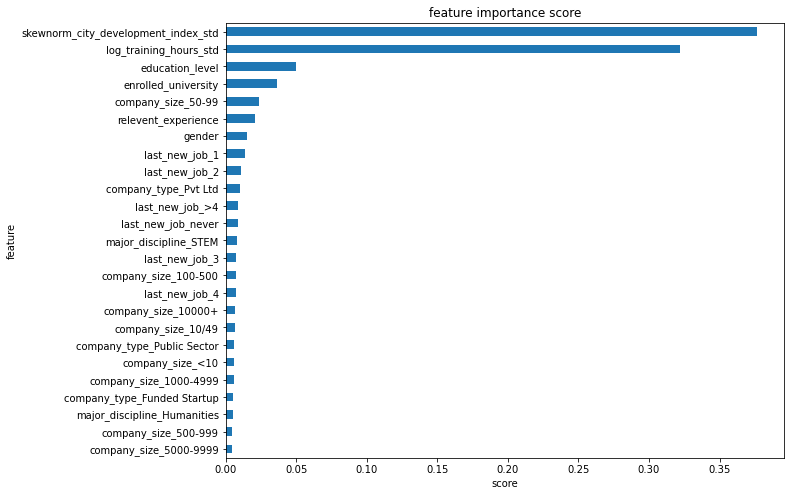

In [85]:
show_feature_importance(rf)

In [86]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

In [87]:
# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                       

In [88]:
# Predict & Evaluation
y_pred = rf_tuned.predict(xtest)#Check performa dari model
eval_classification(rf_tuned, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.41
Recall (Test Set): 0.19
F1-Score (Test Set): 0.26
AUC: 0.55


In [89]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


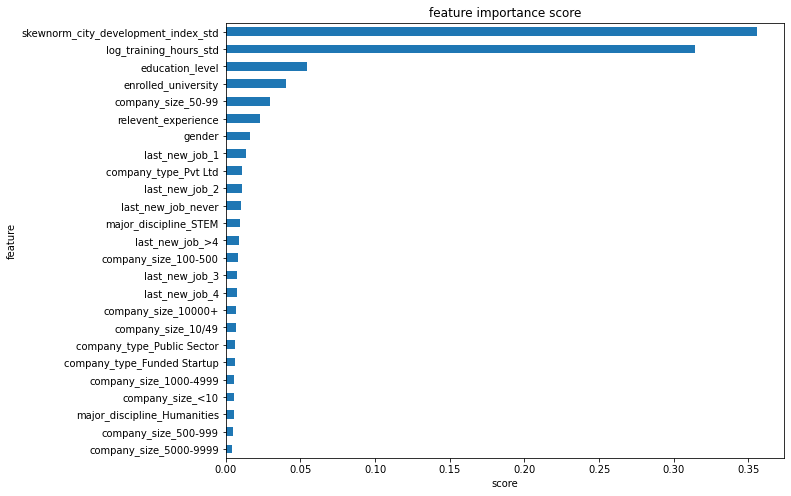

In [90]:
show_feature_importance(rf_tuned.best_estimator_)

In [94]:
print('Train score: ' + str(model.score(xtrain, ytrain)))
print('Test score:' + str(model.score(xtest, ytest)))

Train score: 0.5340909090909091
Test score:0.38738738738738737


## SVM

### percobaan 1

In [106]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(xtrain, ytrain)
#Predict the response for test dataset
y_pred = clf.predict(xtest)

In [107]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [108]:
ytest

4392     1.0
18500    0.0
16240    1.0
11331    1.0
4785     1.0
        ... 
16585    0.0
13158    0.0
10255    1.0
2029     0.0
15293    1.0
Name: target, Length: 5812, dtype: float64

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred)

array([[4355,    0],
       [1457,    0]], dtype=int64)

In [110]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      4355
         1.0       0.00      0.00      0.00      1457

    accuracy                           0.75      5812
   macro avg       0.37      0.50      0.43      5812
weighted avg       0.56      0.75      0.64      5812



### percobaan 2 pake kernel poly

In [111]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(xtrain, ytrain)

SVC(degree=8, kernel='poly')

In [112]:
y_pred = svclassifier.predict(xtest)

In [113]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[4033  322]
 [1230  227]]
              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84      4355
         1.0       0.41      0.16      0.23      1457

    accuracy                           0.73      5812
   macro avg       0.59      0.54      0.53      5812
weighted avg       0.68      0.73      0.69      5812



### Tuning

In [115]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.756 total time=  11.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.756 total time=  11.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.756 total time=  12.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=  12.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.756 total time=  11.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.756 total time=   8.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.756 total time=   9.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.756 total time=   9.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.756 total time=   8.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.756 total time=   8.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.756 total time=   6.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [117]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [118]:
grid_predictions = grid.predict(xtest)
 
# print classification report
print(classification_report(ytest, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.76      0.98      0.85      4355
         1.0       0.49      0.05      0.09      1457

    accuracy                           0.75      5812
   macro avg       0.62      0.52      0.47      5812
weighted avg       0.69      0.75      0.66      5812

